In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
from scipy.stats  import norm, multivariate_normal
from scipy.optimize import minimize

## Cross entropy

$$\begin{align}-\sum_{i}\sum_{j} l_{ij} & \log \tilde{P}(C_j|x_i) \\  &\approx -\int \text{d}X  P(X) \sum_j P(C_j|X)\log \tilde{P}(C_j|X) 
\end{align}$$ 

$$ \operatorname{BCE}(\tilde p, p) = - p\log \tilde{p} - (1-p) \log (1-\tilde{p})$$

Show that this function as a function of $\tilde{p}$ does have a minimum when $\tilde{p}=p$. 

$$\tilde{p} = \frac{1}{1+e^{-x}}, \quad 1-\tilde{p} = \frac{1}{1+e^x}$$

$$p \log (1+e^{-x}) +  (1-p) \log (1+e^x)$$

$$-\frac{p}{1+e^{-x}}+\frac{1-p}{1+e^x} = \frac{1}{1+e^{-x}}-p$$

In [27]:
def bce(pt,p):
    return -p*np.log(pt)+ -(1-p)*np.log(1-pt)

def mse(pt,p):
    return 0.5*(p-pt)*(p-pt)

def logistic(x):
    return 1/(1+np.exp(-x))

def logit(p):
    return np.log(p/(1-p))

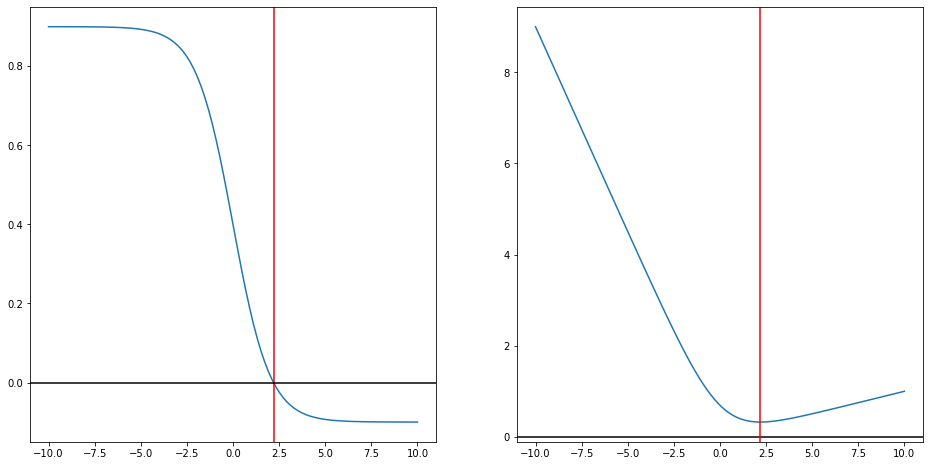

In [28]:
xs=np.linspace(-10,10,100)
p=0.9
ys=-(logistic(xs)-p)
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(xs,ys)
ax[0].axvline(logit(p),c='red');
ax[0].axhline(0,c='black');
ax[1].plot(xs,bce(logistic(xs),p))
ax[1].axhline(0,c='black');
ax[1].axvline(logit(p), c='red');

$$MSE(\tilde{p},p) = \frac{1}{2}\left(\tilde{p}-p\right)^2$$

$$-\left(\frac{1}{1+e^{-x}}-p\right) \frac{e^{-x}}{\left(1+e^{-x}\right)^2}$$

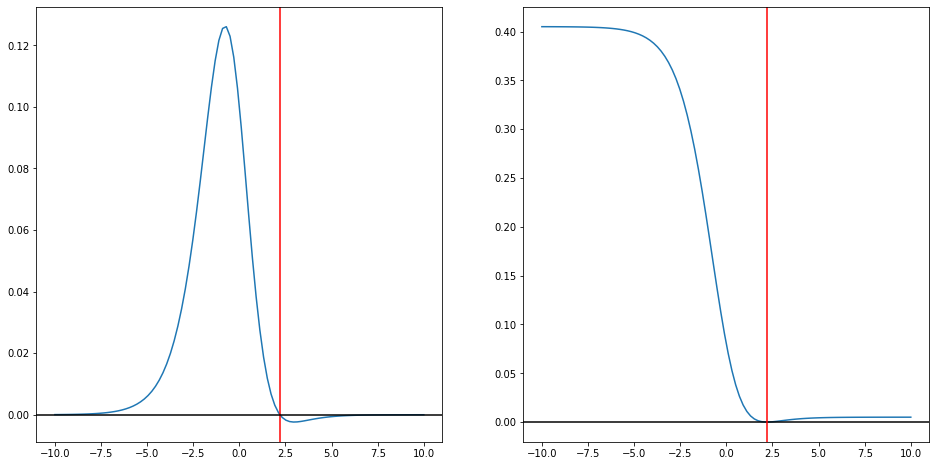

In [5]:
xs=np.linspace(-10,10,100)
p=0.9
ys=-(1.0/(1+np.exp(-xs))-p)*np.exp(-xs)/(1+np.exp(-xs))**2
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(xs,ys)
ax[0].axvline(np.log(p)-np.log(1-p),c='red');
ax[0].axhline(0,c='black');

ax[1].plot(xs,mse(logistic(xs),p));
ax[1].axhline(0,c='black');
ax[1].axvline(logit(p),c='red');

In [6]:
x1 =  multivariate_normal((7,7),(1,1)).rvs(size=100)
x2 = multivariate_normal((-7,-7), (1,1)).rvs(size=100)

In [7]:
X = np.concatenate((x1,x2), axis=0)

In [8]:
Y = np.concatenate((np.ones(100), np.zeros(100)))

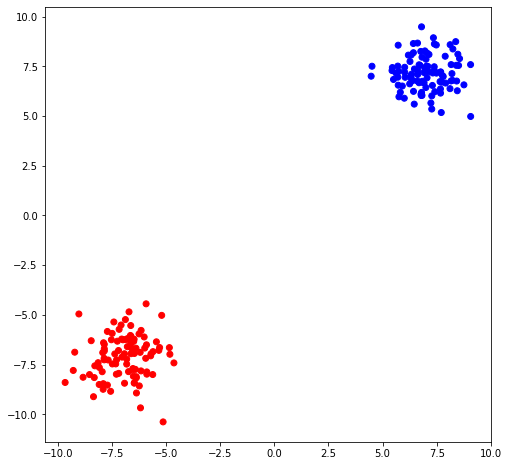

In [29]:
cols=np.array(['red','blue'])
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1],c=cols[Y.astype(np.int)]);

$$\tilde{y}_i = \beta_0x_{i0} +\beta_1x_{i1}$$

In [10]:
def lin(x,b1,b2):
    return np.moveaxis(np.multiply.outer(x[:,0],b1) +  np.multiply.outer(x[:,1],b2),0,-1)

$$ \tilde{p}_i = \frac{1}{1+e^{-y_i}}$$ 

In [11]:
def logistic(x,b1,b2):
    logit = lin(x,b1,b2)
    return 1/(1+np.exp(-logit))

$$\frac{1}{2}\sum_i (\tilde{p}_i-l_i)^2$$

In [24]:
def mse(x, y, b1, b2):
        err = logistic(x,b1,b2)-y
        return 0.5*np.sum(err*err, axis=-1)/len(x)

In [25]:
b1s = np.linspace(-2,2,500)
b2s = np.linspace(-2,2,500)
grid  = np.meshgrid(b1s,b2s)
zs = mse(X,Y, grid[0], grid[1])

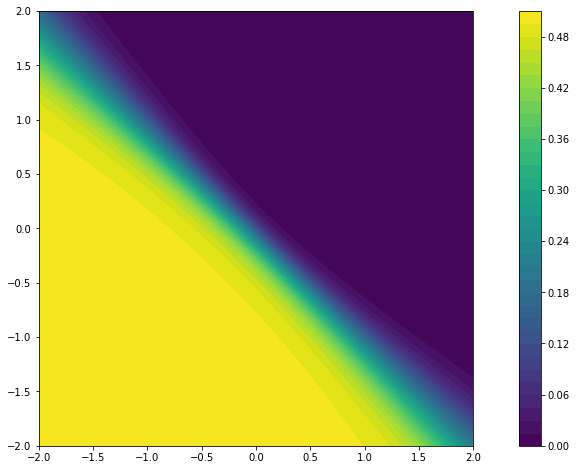

In [14]:
fig = plt.figure(figsize=(9,8))
gs=gridspec.GridSpec(1,2, width_ratios=[4,0.2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cs=ax1.contourf(grid[0], grid[1],zs, levels=40);
fig.colorbar(cs, cax=ax2);

In [15]:
phis = np.linspace(-2,2,500)
es = mse(X,Y, phis, phis)

In [16]:
minimize(lambda x: mse(X,Y,x,x),[-2]).x

array([-2.])

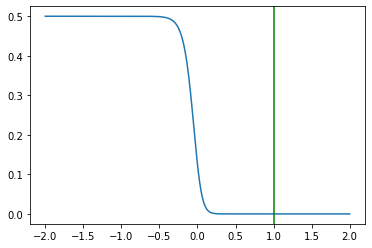

In [17]:
plt.plot(phis,es)
plt.axvline(1,c='green')

$$\sum_i l_i \log \tilde{p}_i + (1-l_i)\log (1-\tilde{p})$$

In [18]:
def ce(x, y, b1, b2):
        logit =  logistic(x,b1,b2)
        return -np.sum(y*np.log(logit) + (1-y)*np.log(1-logit), axis=-1)

In [19]:
ce(X,Y,1,1)

0.0003855652357693367

In [20]:
ces = ce(X,Y, grid[0], grid[1])

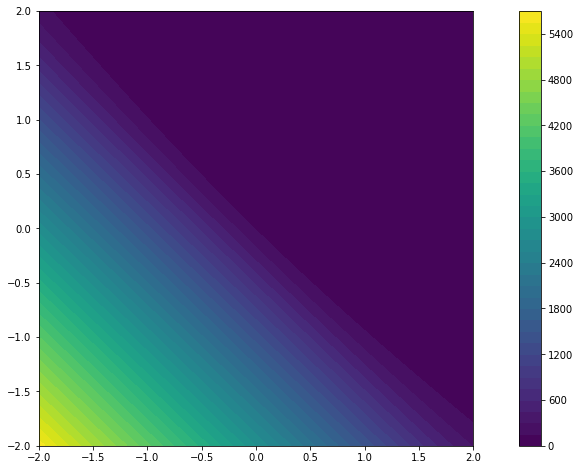

In [21]:
fig = plt.figure(figsize=(9,8))
gs=gridspec.GridSpec(1,2, width_ratios=[4,0.2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cs=ax1.contourf(grid[0], grid[1],ces, levels=40);
fig.colorbar(cs, cax=ax2);

In [22]:
phis = np.linspace(-2,2,500)
es = ce(X,Y,phis, phis)

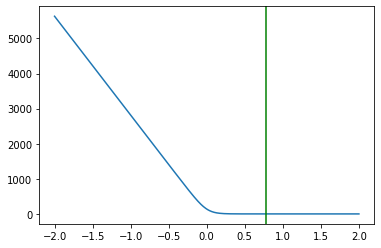

In [23]:
plt.plot(phis,es)
plt.axvline(np.pi/4,c='green')